In [1]:
import time
import datetime
import requests
import pandas as pd
import numpy as np


In [2]:

def etherroll(fromBlock,toBlock):
    address = '0xa52e014b3f5cc48287c2d483a3e026c32cc76e6d'
    topic0 = '0x8dd0b145385d04711e29558ceab40b456976a2b9a7d648cc1bcd416161bf97b9'
    apikey = 'yourapikey'
    url = f'https://api.etherscan.io/api?module=logs&action=getLogs&fromBlock={fromBlock}&toBlock={toBlock}&address={address}&topic0={topic0}&apikey={apikey}'
    request = requests.get(url)
    results = request.json()
    new = []
    i = 0
    while i < len(results['result']):
        mdata = results['result'][i]['data']
        address = results['result'][i]['topics'][3]
        block = int(results['result'][i]['blockNumber'],16)
        timest = datetime.datetime.fromtimestamp(int(results['result'][i]['timeStamp'],16)).strftime('%Y-%m-%d %H:%M:%S')
        new.append([
            address
            ,block
            ,timest
            ,int(mdata[2:66], 16)
            ,int(mdata[66:130], 16)
            ,int(mdata[130:194], 16)/1000000000000000000
        ])
        i += 1
    edf = pd.DataFrame(new, columns = ['address','block','timestamp','roll under', 'roll', 'amount'])
    edf.dropna
    edf['result'] = np.where(edf['roll']<edf['roll under'], 1, 0)
    edf['wager'] = round(edf.amount*((edf['roll under']-1)/100)*(1.01010101010101),3)
    edf['profit'] = np.where(edf['result']==1,edf['amount'] - edf['wager'],edf['wager']*(-1))
    return edf


In [4]:
a = etherroll(8540000,8550001)
time.sleep(1)
b = etherroll(8550001,8560000)
time.sleep(1)
c = etherroll(8560001,8570000)
time.sleep(1)
d = etherroll(8570001,8580000)
time.sleep(1)
e = etherroll(8580001,8590000)
time.sleep(1)
f = etherroll(8590001,8600000)
time.sleep(1)
g = etherroll(8600001,8610000)


In [5]:
df = pd.concat([a,b,c,d,e,f,g],ignore_index=True).drop_duplicates().reset_index(drop=True)

In [6]:
df.shape

(3159, 9)

In [7]:
df.to_csv('~/Downloads/myetheroll.csv', index=False)


In [8]:

df.head()


,address,block,timestamp,roll under,roll,amount,result,wager,profit
0,0x0000000000000000000000003ef57c53c3b7f3cec325...,8540354,2019-09-13 04:52:08,51,84,0.200000,0,0.101,-0.101000
1,0x0000000000000000000000006451744083c7c4ff5204...,8540354,2019-09-13 04:52:08,67,26,0.300000,1,0.200,0.100000
2,0x000000000000000000000000840b83e869ba8b125362...,8540355,2019-09-13 04:52:24,86,76,0.232941,1,0.200,0.032941
3,0x0000000000000000000000001732cd60029acffcb540...,8540355,2019-09-13 04:52:24,47,70,0.200000,0,0.093,-0.093000
4,0x00000000000000000000000084ad2a2d67cba083962a...,8540355,2019-09-13 04:52:24,50,78,0.200000,0,0.099,-0.099000


In [9]:
df.result.mean()

0.4805318138651472

In [10]:
df.roll.describe()

count    3159.000000
mean       50.819880
std        28.648735
min         0.000000
25%        26.000000
50%        52.000000
75%        76.000000
max       100.000000
Name: roll, dtype: float64

In [11]:
df['roll under'].describe()

count    3159.000000
mean       48.982273
std        26.191088
min         2.000000
25%        40.500000
50%        50.000000
75%        65.000000
max        99.000000
Name: roll under, dtype: float64

In [12]:
df['profit'].describe()

count    3159.000000
mean        0.277537
std         4.947691
min      -165.657000
25%        -0.099000
50%        -0.002000
75%         0.204082
max        50.000000
Name: profit, dtype: float64

In [13]:

df[['address','result']].groupby(['address'])['result'].size().nlargest(5).reset_index(name='top 5')
            

,address,top 5
0,0x00000000000000000000000084ad2a2d67cba083962a...,932
1,0x00000000000000000000000001da8b0481e8f8bd6af2...,691
2,0x0000000000000000000000004af829eda77a3f129b5f...,246
3,0x00000000000000000000000076591a207b9ef9957938...,187
4,0x000000000000000000000000ae3732e1014f5555935c...,133


In [14]:
x1 = df.groupby('address')['result','roll under','profit'].agg(['count','mean','sum']).reset_index()

x1.head()

address result                 \
                                                      count      mean  sum   
0  0x00000000000000000000000000295815e37eb33a27bf...      2  0.000000    0   
1  0x00000000000000000000000000566011c133ccbd50ab...      1  0.000000    0   
2  0x000000000000000000000000006f24f3fd93b7a19ab3...      2  1.000000    2   
3  0x00000000000000000000000000f2383317ed3ae77a23...      3  1.000000    3   
4  0x00000000000000000000000001da8b0481e8f8bd6af2...    691  0.519537  359   

  roll under                   profit                         
       count       mean    sum  count       mean         sum  
0          2  51.000000    102      2  -0.101000   -0.202000  
1          1  76.000000     76      1  -0.152000   -0.152000  
2          2  78.500000    157      2   0.061688    0.123375  
3          3  63.666667    191      3  14.491667   43.475000  
4        691  53.276411  36814    691   0.163938  113.281134

In [15]:
x1.sort_values(('result', 'count'), ascending=False).head()

address result                 \
                                                       count      mean  sum   
47  0x00000000000000000000000084ad2a2d67cba083962a...    932  0.501073  467   
4   0x00000000000000000000000001da8b0481e8f8bd6af2...    691  0.519537  359   
27  0x0000000000000000000000004af829eda77a3f129b5f...    246  0.065041   16   
43  0x00000000000000000000000076591a207b9ef9957938...    187  0.518717   97   
51  0x000000000000000000000000ae3732e1014f5555935c...    133  0.112782   15   

   roll under                   profit                        
        count       mean    sum  count      mean         sum  
47        932  49.969957  46572    932  0.303510  282.871265  
4         691  53.276411  36814    691  0.163938  113.281134  
27        246   8.142276   2003    246  0.244303   60.098429  
43        187  49.871658   9326    187  0.409930   76.656887  
51        133   8.458647   1125    133  0.430564   57.264964

In [16]:
(932+691+246+187+133)/3159

0.6929408040519152

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

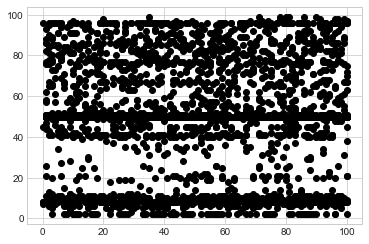

In [18]:

plt.plot(df['roll'], df['roll under'], 'o', color='black');

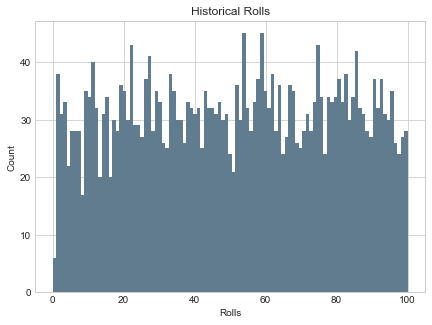

In [19]:
plt.figure(figsize=(7,5))
df.roll.plot.hist(grid=True, bins=101, rwidth=1,color='#607c8e')

plt.title('Historical Rolls')
plt.xlabel('Rolls')
plt.ylabel('Count')
plt.grid(axis='x', alpha=1)

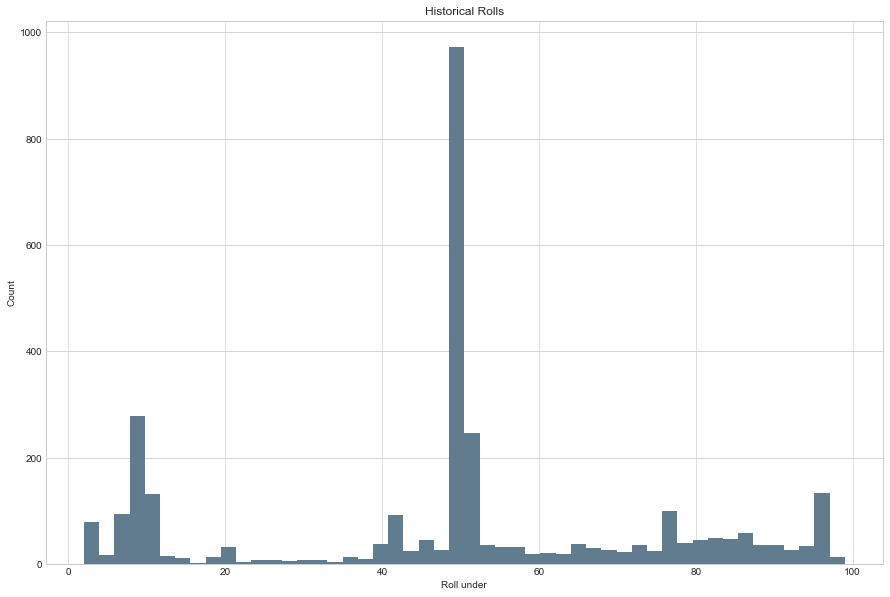

In [20]:
plt.figure(figsize=(15,10))
df['roll under'].plot.hist(grid=True, bins=50, rwidth=1,
                   color='#607c8e')
plt.title('Historical Rolls')
plt.xlabel('Roll under')
plt.ylabel('Count')
plt.grid(axis='x', alpha=0.75)

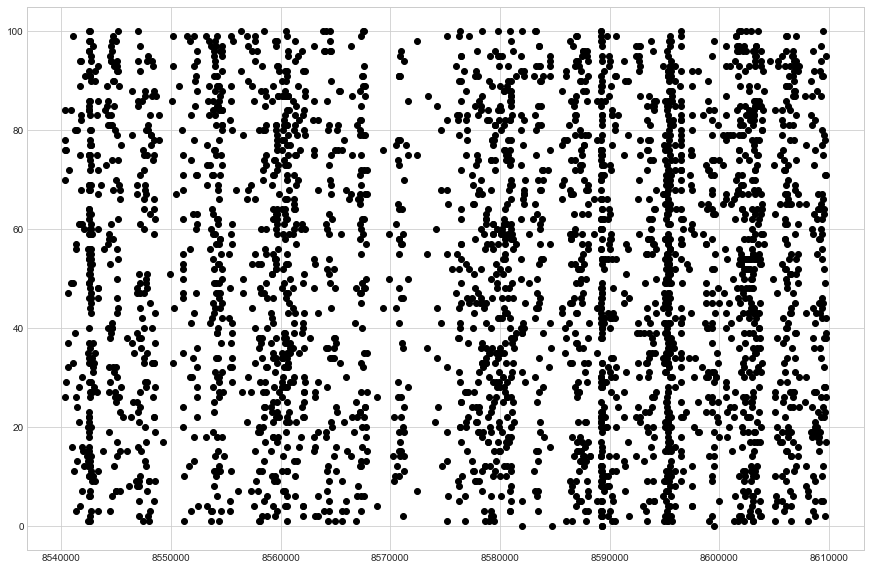

In [21]:
plt.figure(figsize=(15,10))
plt.plot(df.block, df.roll, 'o', color='black')

In [22]:
df3 = df[['roll under','roll','result','wager','profit']]
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,roll under,roll,result,wager,profit
roll under,1,0.028,0.52,0.11,-0.057
roll,0.028,1,-0.62,-0.026,-0.18
result,0.52,-0.62,1,0.087,0.18
wager,0.11,-0.026,0.087,1,-0.21
profit,-0.057,-0.18,0.18,-0.21,1


In [23]:
df.head()

,address,block,timestamp,roll under,roll,amount,result,wager,profit
0,0x0000000000000000000000003ef57c53c3b7f3cec325...,8540354,2019-09-13 04:52:08,51,84,0.200000,0,0.101,-0.101000
1,0x0000000000000000000000006451744083c7c4ff5204...,8540354,2019-09-13 04:52:08,67,26,0.300000,1,0.200,0.100000
2,0x000000000000000000000000840b83e869ba8b125362...,8540355,2019-09-13 04:52:24,86,76,0.232941,1,0.200,0.032941
3,0x0000000000000000000000001732cd60029acffcb540...,8540355,2019-09-13 04:52:24,47,70,0.200000,0,0.093,-0.093000
4,0x00000000000000000000000084ad2a2d67cba083962a...,8540355,2019-09-13 04:52:24,50,78,0.200000,0,0.099,-0.099000


https://myetheroll.com/#/rolls/0x84ad2a2d67cBa083962A6D5AAC25e670cF664A18

In [24]:
df.wager.describe()

count    3159.000000
mean        0.948123
std         4.516606
min         0.002000
25%         0.099000
50%         0.200000
75%         0.500000
max       165.657000
Name: wager, dtype: float64

In [25]:
sum(df.wager)

2995.1210000000133

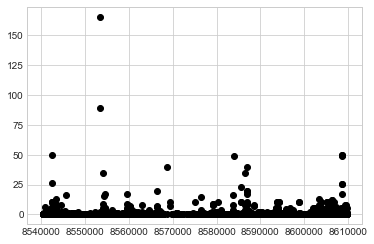

In [26]:
plt.plot(df.block, df.wager, 'o', color='black')

In [27]:
from  matplotlib import pyplot
import seaborn


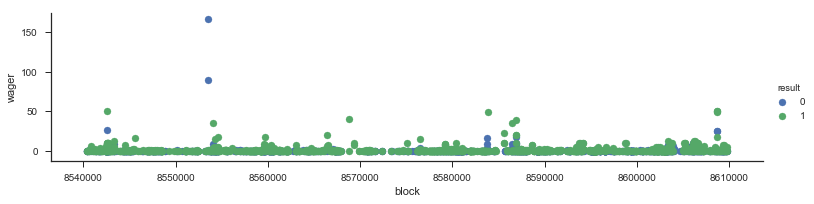

In [28]:

seaborn.set(style='ticks', rc={'figure.figsize':(91.7,8.27)})

fg = seaborn.FacetGrid(data=df, hue='result', aspect=3.61)
fg.map(pyplot.scatter, 'block', 'wager').add_legend()

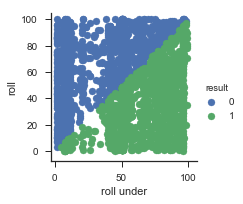

In [29]:
fg = seaborn.FacetGrid(data=df, hue='result', aspect=1)
fg.map(pyplot.scatter, 'roll under', 'roll').add_legend()

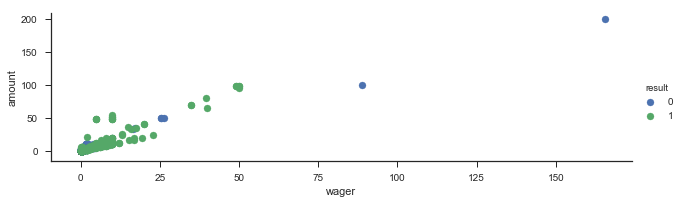

In [30]:
fg = seaborn.FacetGrid(data=df, hue='result', aspect=3)
fg.map(pyplot.scatter, 'wager', 'amount').add_legend()

In [31]:
df[df.roll == 0]

,address,block,timestamp,roll under,roll,amount,result,wager,profit
1593,0x0000000000000000000000005b519e4cde09828d4097...,8581979,2019-09-19 16:42:59,96,0,0.20,1,0.192,0.008
1682,0x00000000000000000000000074f53294aebe01c84710...,8584749,2019-09-20 03:15:22,45,0,0.25,1,0.111,0.139
1952,0x000000000000000000000000ae3732e1014f5555935c...,8589289,2019-09-20 19:56:50,8,0,0.43,1,0.030,0.400
1961,0x000000000000000000000000ae3732e1014f5555935c...,8589309,2019-09-20 20:01:41,8,0,0.46,1,0.033,0.427
1965,0x000000000000000000000000ae3732e1014f5555935c...,8589312,2019-09-20 20:02:17,8,0,0.46,1,0.033,0.427
2554,0x0000000000000000000000004af829eda77a3f129b5f...,8599547,2019-09-22 10:28:39,7,0,0.28,1,0.017,0.263


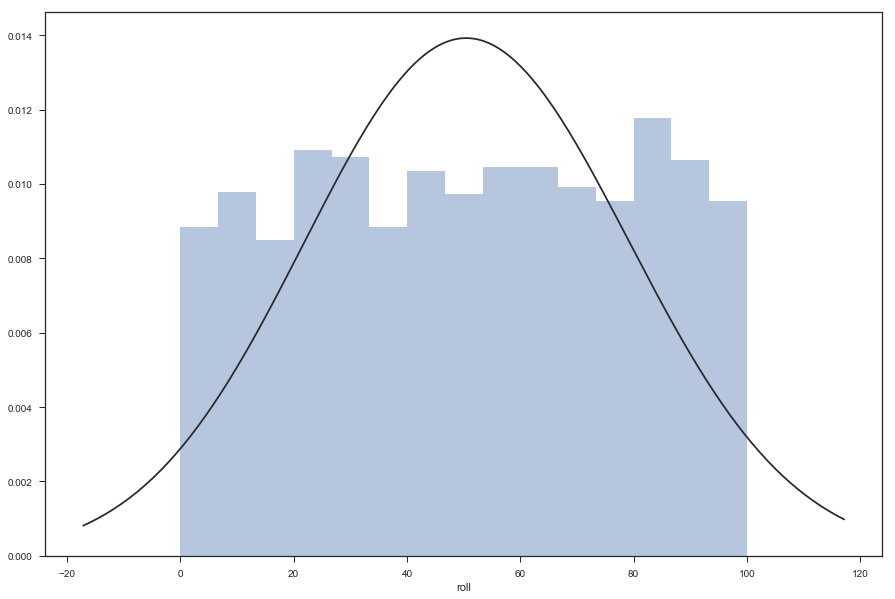

In [32]:
plt.figure(figsize=(15,10))
from scipy import stats

seaborn.distplot(df.roll, kde=False, fit=stats.gamma)

/Users/sedaghatfar/anaconda/envs/py3k/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


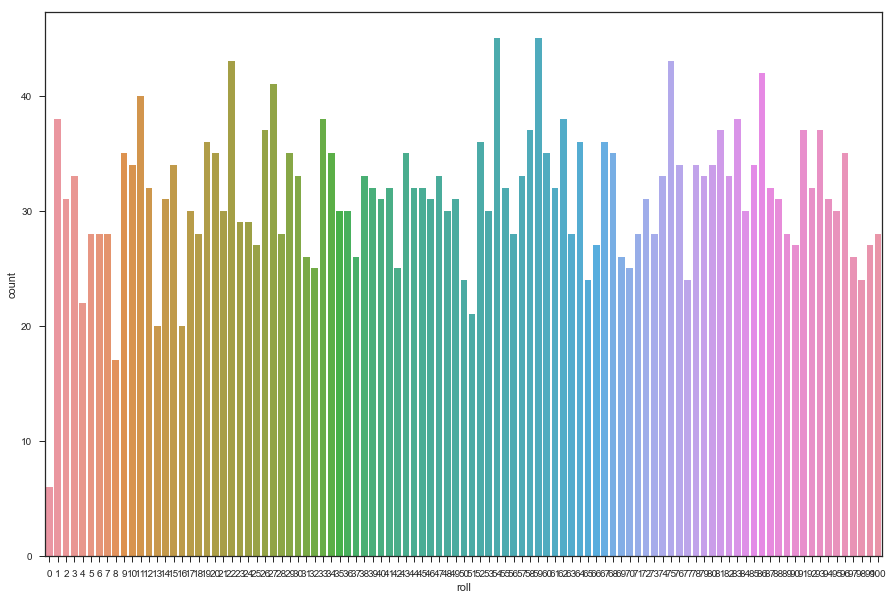

In [33]:
plt.figure(figsize=(15,10))
seaborn.countplot(x="roll", data=df)